Regression is basically a process which predicts the relationship between x and y based on features.
This time we are going to practice Linear Regression with Boston House Price Data that are already embedded in scikit-learn datasets

**Useful functions**
- sklearn.metrics.mean_squared_error: famous evaluation method (MSE)

- np.sqrt(x): square root of tensor x

- linear_model.coef_ : get `Regression coefficient` of the fitted linear model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/toeun_kim/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [12]:
BOSTON_DATA = datasets.load_boston()
# TODO: get rid of the semicolon and see how the data look like.
BOSTON_DATA;

In [13]:
# Load both boston data and target, and convert it as dataframe.
def load_data_target(dataset):
    # TODO: make the raw dataset cleaner and easier to process -> use dataframe
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    # TODO: put the target data (price) to the dataframe we just made.
    print("Before adding target: ", df.shape)
    df['PRICE'] = dataset.target
    print("After adding target: {} \n {}\n".format(df.shape, df.head(2)))
    return df

In [14]:
"""
10 features as default.
Why didn't I put all the 13 features? Because n_row=2 and n_col=5 as default.
It will create 10 graphs for each features.
"""
def plotting_graph(df, features, n_row=2, n_col=5):
    fig, axes = plt.subplots(n_row, n_col, figsize=(16, 8))

    assert len(features) == n_row * n_col

    # TODO: Draw a regression graph using seaborn's regplot
    for i, feature in enumerate(features):
        row = int(i / n_col)
        col = i % n_col
        sns.regplot(x=feature, y='PRICE', data=df, ax=axes[row][col])

    plt.show()

In [15]:
def split_dataframe(df):
    label_data = df['PRICE']
    # others without PRICE
    # axis!! --> Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
    input_data = df.drop(['PRICE'], axis=1)

    # TODO: split! Set random_state if you want consistently same result
    input_train, input_eval, label_train, label_eval = train_test_split(input_data, label_data, test_size=0.3,
                                                                        random_state=42)

    return input_train, input_eval, label_train, label_eval

Before adding target:  (506, 13)
After adding target: (506, 14) 
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6  



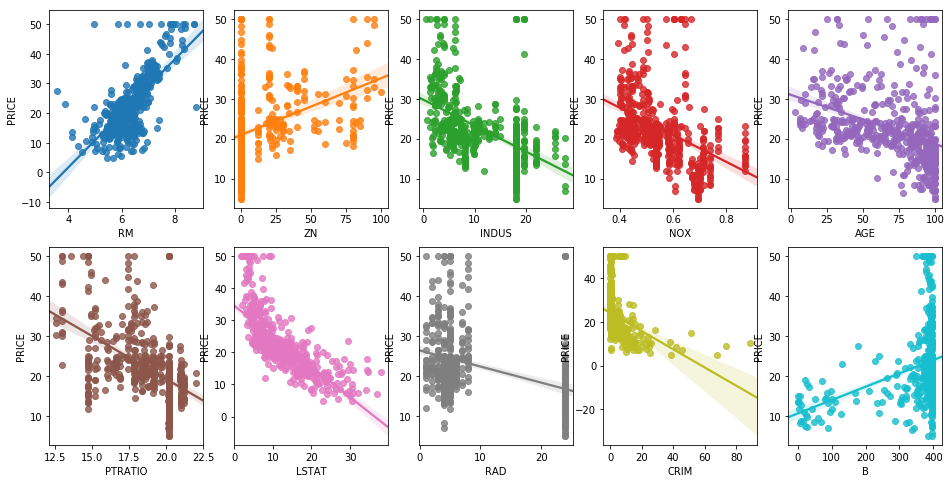

In [16]:
df_data_target = load_data_target(BOSTON_DATA)
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD', 'CRIM', 'B']
plotting_graph(df_data_target, features, n_row=2, n_col=5)

In [7]:
input_train, input_eval, label_train, label_eval = split_dataframe(df_data_target)

# TODO: Load your machine learning model
model = LinearRegression()
# TODO: Train!
model.fit(input_train, label_train)
# TODO: make prediction with unseen data!
pred = model.predict(input_eval)
# TODO: what is mse between the answer and your prediction?
mse = mean_squared_error(label_eval, pred)
# TODO: RMSE
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3F}'.format(mse, rmse))
# Regression Coefficient
print('Regression Coefficients:', np.round(model.coef_, 1))
# sort from the biggest
coeff = pd.Series(data=model.coef_, index=input_train.columns).sort_values(ascending=False)
print(coeff)

MSE: 21.517, RMSE: 4.639
Regression Coefficients: [ -0.1   0.    0.    3.1 -15.4   4.1  -0.   -1.4   0.2  -0.   -0.9   0.
  -0.5]
RM          4.057199
CHAS        3.119835
RAD         0.242727
INDUS       0.049523
ZN          0.035809
B           0.011794
TAX        -0.008702
AGE        -0.010821
CRIM       -0.133470
LSTAT      -0.547113
PTRATIO    -0.910685
DIS        -1.385998
NOX       -15.417061
dtype: float64
